In [ ]:
!wget https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/ms/14_elementary_ca_2310.ipynb

--2023-06-23 22:24:55--  https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/ms/14_elementary_ca_2310.ipynb
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 39810 (39K) [text/plain]
Saving to: ‘14_elementary_ca_2310.ipynb’

14_elementary_ca_23 100%[===================>]  38.88K  --.-KB/s    in 0s      

2023-06-23 22:24:55 (118 MB/s) - ‘14_elementary_ca_2310.ipynb’ saved [39810/39810]



### Graphs

A mathematical graph is a set of nodes and edges. The nodes (also called vertices or objects) are connected together by the edges (also called links or connections or arrows or arcs). For any graph we need to know two things:

1. Set of nodes in the graph
2. Set of edges from each node

- Grid graphs
A grid can be viewed as a special case of a graph.

![](https://mathworld.wolfram.com/images/eps-svg/GridGraph_701.svg)

See: 
- https://www.redblobgames.com/pathfinding/grids/graphs.html
- https://mathworld.wolfram.com/GridGraph.html

### Conway's game of life

Conway's Game of Life is a cellular automaton devised by the British mathematician John Horton Conway in 1970. It is a zero-player game, meaning that its evolution is determined solely by its initial state, with no further input required. Despite its simplicity, the Game of Life exhibits complex and unpredictable behavior.

A cellular automaton is a mathematical model or a computational system composed of a grid of cells, each of which can exist in a finite number of states. 

### Substrate:

Conway's Game is played on a grid of cells, which can be thought of as a two-dimensional universe. The cells in the grid, have a Moore neighborhood with radius $r=1$. That is, each cell $k$ has 8 neighbors as follows: 

<img src="https://www.researchgate.net/profile/Gianluigi-Folino/publication/225181504/figure/fig2/AS:669129157668866@1536544231545/the-cGP-grid-and-the-Moore-neighborhood.ppm"  width="40%">

- Von Neumann vs Moore
![](http://www.jcasim.de/main/img14.gif)

### Evolution:

The behavior of the entire system evolves over time based on a set of predefined rules that govern the interactions between neighboring cells.

Each cell can be in one of two states: alive or dead, according to the following rules:

1. A live cell with fewer than two live neighbors dies.
2. A live cell with exactly two or three live neighbors lives.
3. A live cell with more than three live neighbors also dies.
4. A dead cell with exactly three live neighbors becomes alive.

<img src="https://www.researchgate.net/publication/339605473/figure/fig5/AS:869062565437443@1584212070801/Rules-of-Conways-Game-of-Life.png"  width="40%">

- Paralell update: The synchronous scheme - all cells are updated in parallel at each time step. This is the conventional model.
  - Check: https://en.wikipedia.org/wiki/Asynchronous_cellular_automaton

- Initialization ($t=0$): random initialization with $P(X=1) = p$.

  - http://www.scholarpedia.org/article/Game_of_Life
  - https://ocw.mit.edu/courses/6-087-practical-programming-in-c-january-iap-2010/86f222c2f2558ba9559771ed913513f5_MIT6_087IAP10_lab01.pdf
  - https://ocw.mit.edu/courses/electrical-engineering-and-computer-science/6-087-practical-programming-in-c-january-iap-2010/labs/MIT6_087IAP10_lab01.pdf
  - https://www.uu.nl/sites/default/files/hanson.pdf


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.stats import bernoulli

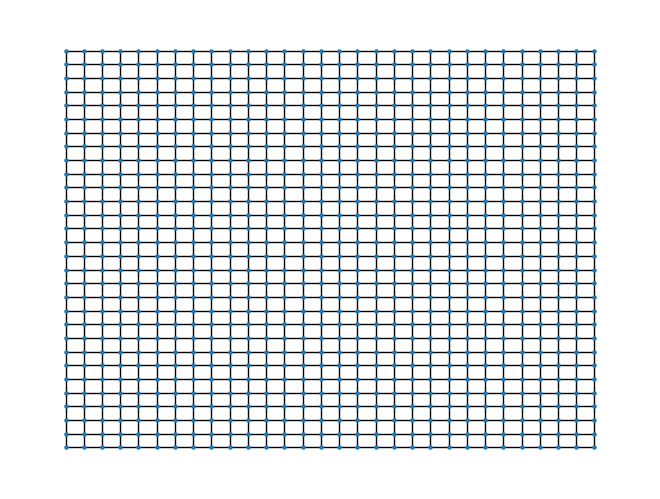

In [ ]:
grid_size = 30

G = nx.grid_2d_graph(grid_size, grid_size)

pos = {(x,y): (x, y) for x,y in G.nodes()}

nx.draw(G, pos=pos, with_labels=False, node_size=5)

In [ ]:
node = (4, 2)
neighbors = np.array(list(G.neighbors(node)))
neighbors

array([[3, 2],
       [5, 2],
       [4, 1],
       [4, 3]])

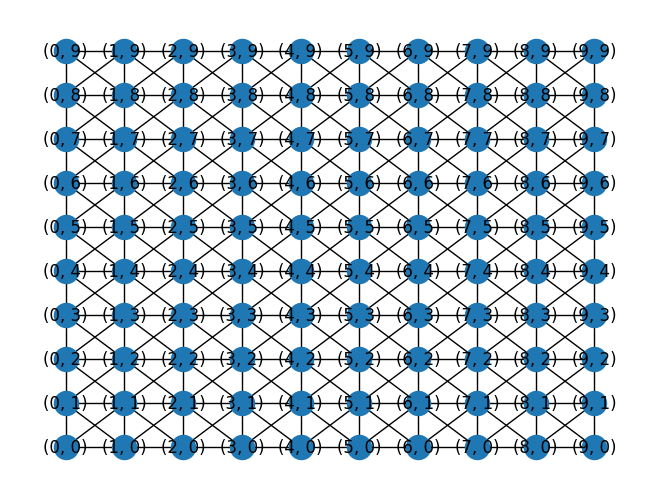

In [ ]:
# Cell automata structure: live in a grid
# Each cell with its kneigborhood
# A grid is regular graph
grid_size = 10

G = nx.grid_2d_graph(grid_size, grid_size)

pos = {(x,y): (x, y) for x,y in G.nodes()}

G.add_edges_from(
    [((x,y), (x+1, y+1)) for x in range(grid_size-1) for y in range(grid_size-1)] + 
    [((x+1,y), (x, y+1)) for x in range(grid_size-1) for y in range(grid_size-1)]
)

nx.draw(G, pos=pos, with_labels=True)

In [ ]:
#states = np.zeros((grid_size, grid_size), dtype='int')
# Start with p*grid_size*grid_size of cells alive (in average)
p = 0.2
states = bernoulli.rvs(p, size=(grid_size, grid_size))
states

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]])

In [ ]:
node = (4, 2)
neighbors = np.array(list(G.neighbors(node)))
states[node], states[neighbors[:,0], neighbors[:,1]], states[neighbors[:,0], neighbors[:,1]].sum()

(0, array([0, 1, 1, 1, 0, 0, 0, 0]), 3)

In [ ]:
activity = states[neighbors[:,0], neighbors[:,1]].sum()
# Cell is alive
if states[node]:
    # Isolation and dies
    if activity < 2:
        states[node] = 0
    # Overpopulation and dies
    if activity > 3:
        states[node] = 0
else:
    # Get born
    if activity == 3:
        states[node] = 1
states[node]

1

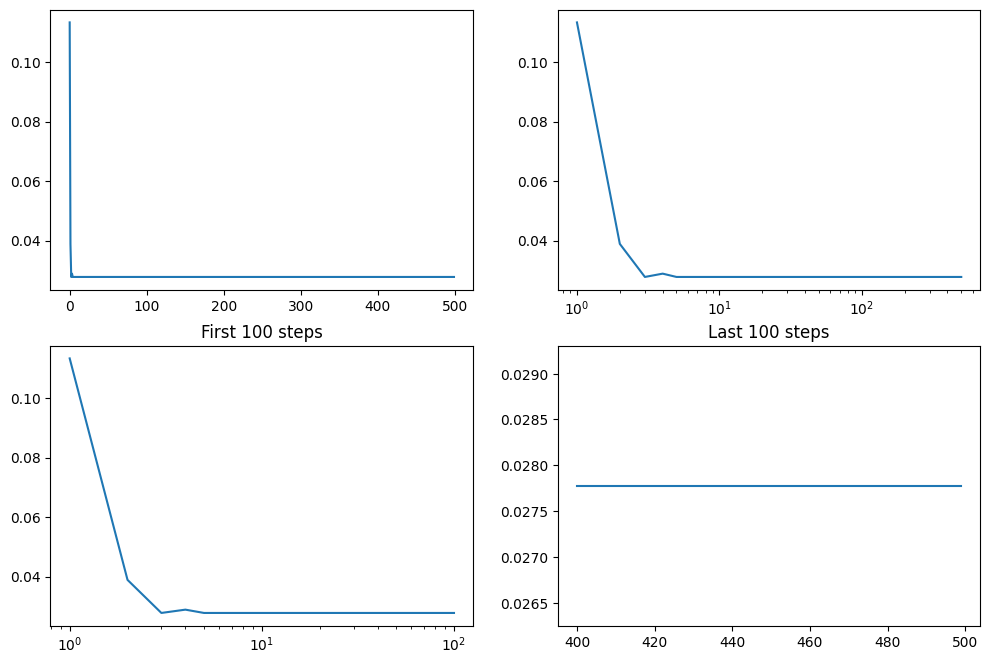

In [ ]:
grid_size = 30

G = nx.grid_2d_graph(grid_size, grid_size)

pos = {(x,y): (x, y) for x,y in G.nodes()}

G.add_edges_from(
    [((x,y), (x+1, y+1)) for x in range(grid_size-1) for y in range(grid_size-1)] + 
    [((x+1,y), (x, y+1)) for x in range(grid_size-1) for y in range(grid_size-1)]
)

p = 0.1

states = bernoulli.rvs(p, size=(grid_size, grid_size))

time = 500

# This is a global activity
mean_activity = [states.mean()]

for t in range(time-1):
    states_t = states.copy()  # This is called parallel or synchronous update 
    for node in G:
        neighbors = np.array(list(G.neighbors(node)))
        # This is a local activity
        activity = states_t[neighbors[:,0], neighbors[:,1]].sum()
        # Cell is alive
        if states_t[node]:  
            # Isolation and dies
            if activity < 2:
                states[node] = 0
            # Overpopulation and dies
            if activity > 3:
                states[node] = 0
        else:
            # Get born
            if activity == 3:
                states[node] = 1

    mean_activity += [states.mean()]

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.plot(mean_activity, marker='')
plt.subplot(2,2,2)
plt.semilogx(range(1, len(mean_activity)+1), mean_activity, marker='')
plt.subplot(2,2,3)
plt.title("First 100 steps")
plt.semilogx(range(1, len(mean_activity[:100])+1), mean_activity[:100], marker='')
plt.subplot(2,2,4)
plt.title("Last 100 steps")
plt.plot(mean_activity[-100:], marker='')
plt.xticks(range(0,101,20), range(400,501,20));

In [ ]:
mean_activity[-10:]

[0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776,
 0.027777777777777776]

- Check: 
  - https://raw.githubusercontent.com/marsgr6/r-scripts/master/notebooks/game_of_life.py
  - https://github.com/EiichiroIto/NovaStelo
  - https://playgameoflife.com/

[![IMAGE ALT TEXT](https://i9.ytimg.com/vi/zzUhes2aryk/mqdefault.jpg?sqp=CJTHs6QG-oaymwEoCMACELQB8quKqQMcGADwAQH4AfACgALyAooCDAgAEAEYXyBfKF8wDw==&rs=AOn4CLA-7fHeuhkaScc73Z5u40z8n8zOsA)](https://youtube.com/shorts/zzUhes2aryk?feature=share "Game of Life")

### Proyecto Integrador 202320

- https://anaconda.org/marsgr6/proyecto_ms_202320/notebook

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6270f206-ff88-4533-afc5-e2a8c2de37fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>